## Supervised Regression Model

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings



In [36]:
warnings.filterwarnings('ignore')

### Reading Data

In [37]:
data_df = pd.read_csv('headbrain.csv')
data_df.tail()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


### Data insights

- This data set has 4 columns and 237 rows
- Data about the relation of human head size and brains weight
- First two column data is not understandable as its value is onle 1 or two. Here is no metadata to understand.

In [38]:
print("Shape of Data:\n ", data_df.shape)

print("\n Data info: \n")
data_df.info()

print("\n Data description: \n", data_df.describe())



Shape of Data:
  (237, 4)

 Data info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB

 Data description: 
            Gender   Age Range  Head Size(cm^3)  Brain Weight(grams)
count  237.000000  237.000000       237.000000           237.000000
mean     1.434599    1.535865      3633.991561          1282.873418
std      0.496753    0.499768       365.261422           120.340446
min      1.000000    1.000000      2720.000000           955.000000
25%      1.000000    1.000000      3389.000000          1207.000000
50%      1.000000    2.000000      3614.000000          1280.000000
75%      2.000000    2.000000  

### Data Cleaning and filtering

In [39]:
# Nul value checking
data_df.sum().isnull()

Gender                 False
Age Range              False
Head Size(cm^3)        False
Brain Weight(grams)    False
dtype: bool

### Machine Learning 

## Regression line Plotting

### Using Least Square Method 



#### Creating Variable
- Independent variable
    - The variable that we try to find or predict the value by using other value by Machine learning process or model.
- Dependent Variable
    - The varable, based on which we predict or try to find the independet variables value by ML model or process. 

In [40]:
# Independent variable
X = data_df['Head Size(cm^3)'].values
# Dependent Variable
Y = data_df['Brain Weight(grams)'].values

In [41]:
# Mean calculation of two variables
mean_X = X.mean()
mean_Y = Y.mean()
print("Mean of X = ", mean_X,"\nMean of y = ", mean_Y)
# mean_X = np.mean(X)
# mean_y = np.mean(y)
# print("Mean of X = ", mean_X,"\nMean of y = ", mean_y)


Mean of X =  3633.9915611814345 
Mean of y =  1282.873417721519


- Slope = Σ [ (xi – x)(yi – y) ] / Σ [ (xi – x)2].
    - Numerator = Σ [ (xi – x)(yi – y) ] 
    - Denumerator = Σ [ (xi – x)2]

In [42]:

numerator = 0
denumerator = 0
count_points = len(X)
for i in range(count_points):
    numerator += (X[i] - mean_X) * (Y[i] - mean_Y)
    denumerator += (X[i] - mean_X)**2

slope = numerator / denumerator
y_intercept = mean_Y - (slope * mean_X)
print("Slope = ", slope, "\n y_intercept = ", y_intercept)


Slope =  0.26342933948939945 
 y_intercept =  325.57342104944223


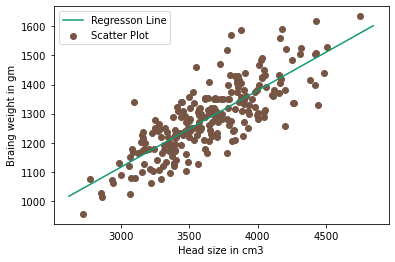

In [44]:
# Plotting regression line values

#max_X = X.max + 100
max_X = np.max(X) + 100
#min_X = X.min - 100
min_X = np.min(X) - 100

# Calculatting the co-ordinates of the regression line
x = np.linspace(min_X, max_X, 1000)
y = slope * x + y_intercept

# Plotting regression line
plt.plot (x, y, color = '#149870', label = 'Regresson Line')

# Plotting Scatter points

plt.scatter(X, Y, c = '#775544', label = "Scatter Plot")

plt.xlabel("Head size in cm3")
plt.ylabel("Braing weight in gm")
plt.legend()
plt.show()



In [46]:
# Checking the model how good with Rsquare
ss_t = 0 # total suum of square
ss_r = 0 # sum of square for regression

for i in range(count_points):
    y_pred = slope * X[i] + y_intercept
    ss_t += (Y[i] - mean_Y) ** 2
    ss_r +=  (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r / ss_t)
print("Rsquare = ", r2)

Rsquare =  0.6393117199570003


## Mchine learning with Scikit-learn

- Default Parameter:

    - sklearn.linear_model.LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape((count_points,1))

# Creating Model

reg_model = LinearRegression()

# Fit the model

reg_model = reg_model.fit(X, Y)

# Prediction

Y_pred = reg_model.predict(X)

# Calculation R2 score

r2_score = reg_model.score(X,Y)

print(" Slope  = ", reg_model.coef_, "\n Y intercept = ", reg_model.intercept_, "\n R2 Score = ", r2_score)


 Slope  =  [0.26342934] 
 Y intercept =  325.5734210494428 
 R2 Score =  0.639311719957


In [52]:
data_df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


#### Taking multiple independent and dependent variable

In [58]:
X = data_df.iloc[:,:-1].values
y = data_df["Brain Weight(grams)"].values
print(X[1:5])
print(y[1:5])

[[   1    1 3738]
 [   1    1 4261]
 [   1    1 3777]
 [   1    1 4177]]
[1297 1335 1282 1590]


In [62]:
# Creating model
reg = LinearRegression()
# Fit the model
reg = reg.fit(X,y)
# Calculating R2 Score
r2_score = reg.score(X, y)

print(" Slope  = ", reg.coef_, "\n Y intercept = ", reg.intercept_, "\n R2 Score = ", r2_score)
print("R-squared is a statistical measure that represents the goodness of fit of a regression model.The ideal value \
for r-square is 1. The closer the value of r-square to 1, the better is the model fitted.")


 Slope  =  [-22.5432537  -23.96844543   0.24421175] 
 Y intercept =  464.5628108859082 
 R2 Score =  0.6528346387526655
R-squared is a statistical measure that represents the goodness of fit of a regression model.The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted.


In [63]:
# Splitting the data
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state= 1)

In [65]:
print("X_train: ", X_train.shape, " X_test: ", X_test.shape, "\ny_train: ", y_train.shape, " y_test: ", y_test.shape)

X_train:  (189, 3)  X_test:  (48, 3) 
y_train:  (189,)  y_test:  (48,)


In [66]:
lr_model = LinearRegression()
lr_model = lr_model.fit(X_train, y_train)
print(f"Train Score: {lr_model.score(X_train, y_train)}")
predict_y = lr_model.predict(X_test)
print(f"Test Score: {lr_model.score(X_test,y_test)}")

data_df_new = pd.DataFrame(data={'Actual_Price': y_test, 'Predicted_Price': predict_y})
data_df_new['residual'] = data_df_new['Actual_Price'] - data_df_new['Predicted_Price']

data_df_new.head(10)

Train Score: 0.6684575368185457
Test Score: 0.5821834330570439


,Actual_Price,Predicted_Price,residual
0,1235,1161.058226,73.941774
1,1270,1295.058990,-25.058990
2,1280,1254.811605,25.188395
3,1165,1323.483706,-158.483706
4,1320,1249.602473,70.397527
5,1590,1439.376157,150.623843
6,1346,1353.669245,-7.669245
7,1485,1400.386503,84.613497
8,1180,1281.978590,-101.978590
9,1180,1165.586057,14.413943


In [69]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_std_train = sc.transform(X_train)
X_std_test = sc.transform(X_test)

In [70]:
lr_model = LinearRegression()
lr_model = lr_model.fit(X_std_train, y_train)
print(f"Train Score: {lr_model.score(X_std_train, y_train)}")
predict_y = lr_model.predict(X_std_test)
print(f"Test Score: {lr_model.score(X_std_test,y_test)}")

data_df_new = pd.DataFrame(data={'Actual_Price': y_test, 'Predicted_Price': predict_y})
data_df_new['residual'] = data_df_new['Actual_Price'] - data_df_new['Predicted_Price']

data_df_new.head(10)

Train Score: 0.6684575368185457
Test Score: 0.5821834330570145


,Actual_Price,Predicted_Price,residual
0,1235,1161.058226,73.941774
1,1270,1295.058990,-25.058990
2,1280,1254.811605,25.188395
3,1165,1323.483706,-158.483706
4,1320,1249.602473,70.397527
5,1590,1439.376157,150.623843
6,1346,1353.669245,-7.669245
7,1485,1400.386503,84.613497
8,1180,1281.978590,-101.978590
9,1180,1165.586057,14.413943


### Simple Linear Regression

In [71]:
from sklearn.datasets import load_boston
data_boston  = load_boston()
print(data_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [72]:
print(data_boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [73]:
print(data_boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3